# NBA Graphics

In [1]:
import pandas as pd

# Cargar los datasets
seasons_data = pd.read_csv('all_seasons.csv')
teams_data = pd.read_csv('teams.csv')

In [2]:
# Mostrar dataset
seasons_data.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,United States of America,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,United States of America,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,United States of America,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,United States of America,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,United States of America,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [3]:
# Mostrar dataset
teams_data.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


## Número de equipos temporada 2022-2023

In [4]:
# Filtro para obtener los datos de la temporada 2022-2023
season_2022_2023 = seasons_data[seasons_data['season'] == '2022-23']

# Contar los equipos de la temporada 2022-2023 
unique_teams_2022_2023 = season_2022_2023['team_abbreviation'].nunique()

unique_teams_2022_2023


30

## Número de temporadas de cada equipo

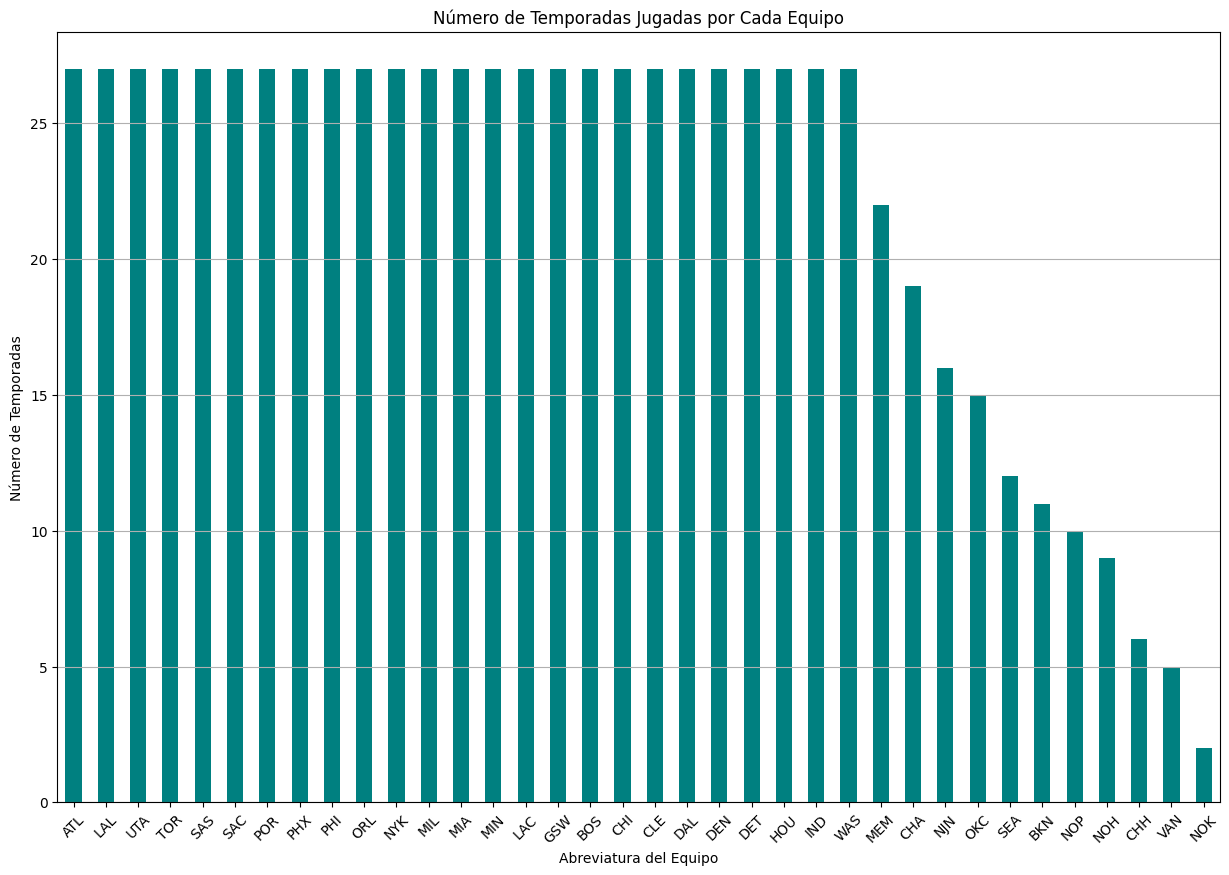

In [5]:
import matplotlib.pyplot as plt
# Contar el número de temporadas jugadas por cada equipo
seasons_played_by_team = seasons_data.groupby('team_abbreviation')['season'].nunique()

# Ordenar los datos para una mejor visualización
seasons_played_by_team_sorted = seasons_played_by_team.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(15, 10))
seasons_played_by_team_sorted.plot(kind='bar', color='teal')
plt.title('Número de Temporadas Jugadas por Cada Equipo')
plt.xlabel('Abreviatura del Equipo')
plt.ylabel('Número de Temporadas')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()


## Número jugadores temporada 2022-2023

In [6]:
# Contar el número de jugadores en la temporada 2022-2023
unique_players_2022_2023 = season_2022_2023['player_name'].nunique()
unique_players_2022_2023

539

## Jugadores que proceden de Collage

In [7]:
# Contar el número de jugadores que fueron a Collage
players_2022 = seasons_data[seasons_data['season'] == '2022-23']
players_from_college_2022_2023 = players_2022[players_2022['college'].notnull()]
num_players_from_college = players_from_college_2022_2023['player_name'].nunique()
print("Prodeceden de Collage:",num_players_from_college)

# Contar el número de jugadores que no fueron a Collage
players_no_college = players_2022[players_2022['college'].isnull()]
num_players_no_college = players_no_college['player_name'].nunique()
print("No prodeceden de Collage:",num_players_no_college)

Prodeceden de Collage: 474
No prodeceden de Collage: 65


## Jugadores españoles por año

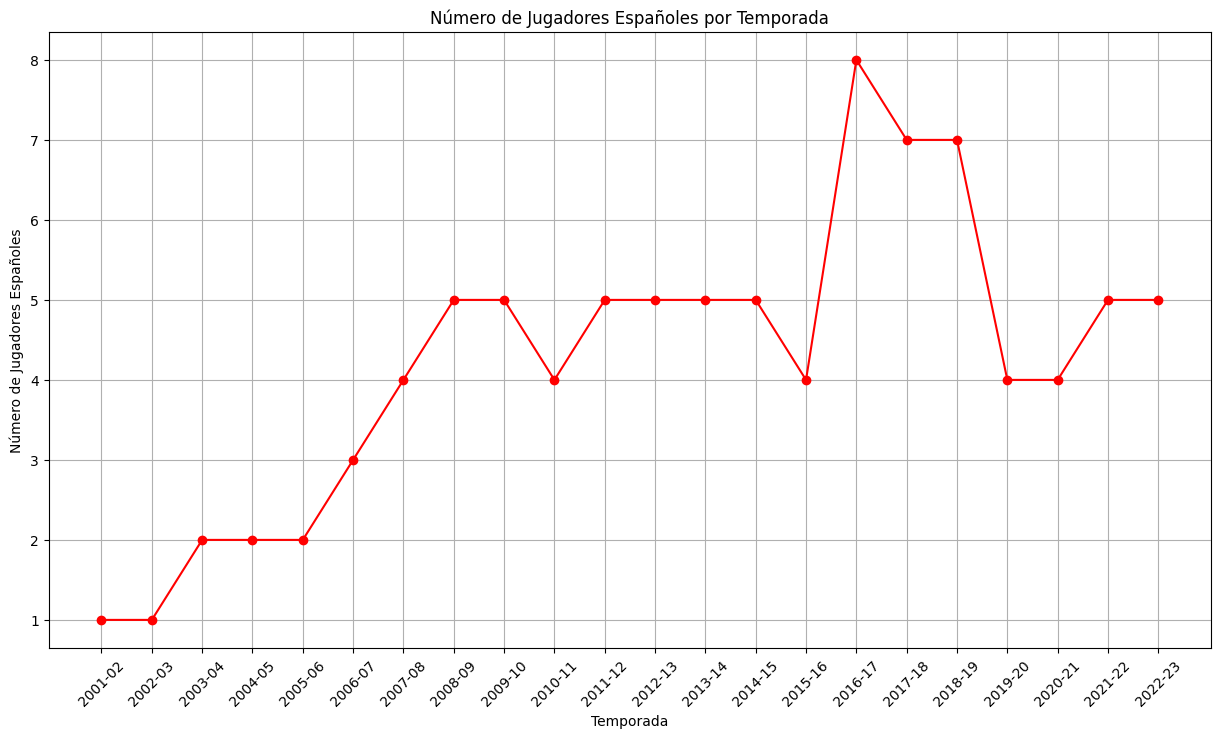

In [8]:
import matplotlib.pyplot as plt

# Filtro para obtener los jugadores españoles
spanish_players = seasons_data[seasons_data['country'] == 'Spain']

# Contar el número de españoles por temporada
spanish_players_by_season = spanish_players.groupby('season')['player_name'].nunique().reset_index()

# Crear el gráfico
plt.figure(figsize=(15, 8))
plt.plot(spanish_players_by_season['season'], spanish_players_by_season['player_name'], marker='o', color='red')
plt.xticks(rotation=45)
plt.xlabel('Temporada')
plt.ylabel('Número de Jugadores Españoles')
plt.title('Número de Jugadores Españoles por Temporada')
plt.grid(True)

# Mostrar el gráfico
plt.show()


## Mapa con el número de jugadores por país de la temporada 2022-2023

C:\Users\amartinezgil\AppData\Local\Temp\ipykernel_9408\2859501115.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 2000x1000 with 0 Axes>

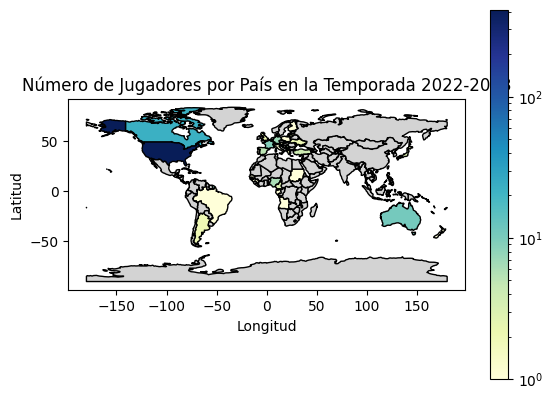

In [9]:
import geopandas as gpd
from matplotlib.colors import LogNorm

# Filtrar la temporada 2022-2023
players_2022 = seasons_data[seasons_data['season'] == '2022-23']

# Agrupar los jugadores por país de la temporada 2022-2023
players_by_country_2022_2023 = players_2022.groupby('country').size().reset_index(name='count')

# Cargar mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Poner a los jugadores en el mapa
world_with_players = world.merge(players_by_country_2022_2023, how='left', left_on='name', right_on='country')

# Crear el mapa
plt.figure(figsize=(20, 10))
world_with_players.plot(column='count', cmap='YlGnBu', edgecolor='black', legend=True, norm=LogNorm(), missing_kwds={'color': 'lightgrey'})
plt.title('Número de Jugadores por País en la Temporada 2022-2023')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


## Crear mapa interactivo

In [10]:
import folium
import pandas as pd
import geopandas as gpd

# Cargar los datos
seasons_data = pd.read_csv('all_seasons.csv')
players_2022 = seasons_data[seasons_data['season'] == '2022-23']

# Agrupar jugadores por país y listar sus nombres
players_by_country = players_2022.groupby('country')['player_name'].apply(list).reset_index()
# Contar el número de jugadores por país
players_by_country['player_count'] = players_by_country['player_name'].apply(len)

# Cargar un mapa mundial
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Crear un mapa base
map = folium.Map(location=[0, 0], zoom_start=2)

# Agregar marcadores al mapa
for idx, row in world.iterrows():
    if row['name'] in players_by_country['country'].values:
        country_data = players_by_country[players_by_country['country'] == row['name']].iloc[0]
        players_list = country_data['player_name']
        players_text = ', '.join(players_list)
        popup_text = f'{row["name"]}: {country_data["player_count"]} players\n{players_text}'
        folium.Marker(
            location=[row['geometry'].centroid.y, row['geometry'].centroid.x], 
            popup=popup_text
        ).add_to(map)

# Guardar el mapa en un archivo HTML       
map.save('jugadoresPorPais2022-2023.html')


C:\Users\amartinezgil\AppData\Local\Temp\ipykernel_9408\2789535858.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
